# Trabajo Data Science - Reyna Gabriel

In [4]:
import pandas                   as pd
import seaborn                  as sns
import matplotlib               as mpl
import matplotlib.pyplot        as plt
import matplotlib.patheffects   as path_effects
import numpy                    as np
import chart_studio.plotly      as py
import statsmodels.formula.api  as sm
import missingno                as msno
import bokeh.io
import pingouin
import os
from scipy                     import stats
from sklearn.preprocessing     import LabelEncoder
from sklearn.ensemble          import RandomForestClassifier
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.model_selection   import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.svm               import SVC
from sklearn.metrics           import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, mean_squared_error
from sklearn.tree              import DecisionTreeClassifier
from sklearn.cluster           import KMeans
from sklearn.metrics           import confusion_matrix
from sklearn.datasets          import load_iris
from scipy.stats               import randint
from bokeh.resources           import INLINE
from bokeh                     import *

bokeh.io.output_notebook(INLINE)

## Introducción

**Contexto empresarial**

Un gerente de negocios de una cartera de tarjetas de crédito para consumidores se enfrenta al problema de la pérdida de clientes. Quiere analizar los datos para descubrir la razón detrás de esto y aprovecharlo para predecir qué clientes tienen más probabilidades de abandonar.

**Objetivos**

En este proyecto se intentará extraer del conjunto de datos el comportamiento de ciertos clientes del banco. Con el fin de proporcionar a los departamentos pertinentes la información que necesitan para comprender mejor a sus clientes. Asimismo, se buscará predecir quiénes se darán de baja para poder acercarse al cliente de manera proactiva, ofrecerles mejores servicios y revertir sus decisiones en la dirección opuesta. Se busca identificar patrones y tendencias que pueden ayudar a los bancos a mejorar sus estrategias de retención de clientes y reducir la tasa de abandono del banco.

**Audiencia**

La audiencia para la presentación incluiría:

Alta dirección del banco: Gerentes generales, directores ejecutivos y otros líderes del banco que toman decisiones estratégicas y están interesados en comprender y abordar el problema de pérdida de clientes.

Equipo de marketing y ventas: Responsables de diseñar estrategias de retención de clientes y promoción de servicios financieros, quienes pueden beneficiarse de los insights obtenidos en el análisis de datos.

Analistas de datos: Profesionales encargados de interpretar y utilizar los datos para respaldar la toma de decisiones. Pueden encontrar útil el enfoque metodológico y los resultados presentados.

Otros miembros del equipo: Cualquier persona dentro del banco que esté interesada en comprender el problema de la pérdida de clientes y las medidas que se tomarán para abordarlo.

**Contexto analítico**

Se proporciona un archivo CSV que consta de 10.000 clientes que mencionan su edad, salario, estado civil, límite de la tarjeta de crédito, categoría de la tarjeta de crédito, etc. Hay casi 18 características. Solo se proporciona el 16,07% de clientes que se han dado de baja.

Se realizarán las siguientes tareas con los datos:

-Leer, transformar y preparar datos para su visualización

-Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

**Problema comercial**

 Proporcionar visualizaciones que respondan las preguntas hipótesis planteadas en el apartado siguiente.

**Preguntas Hipótesis**

 En base a las primeras visualizaciones de la tabla csv de esta cartera de clientes, se plantean las siguientes hipótesis:

- ¿Cómo se ve afectado el salario por el nivel educativo?
- ¿Existe alguna relación entre el género y el salario y/o límite de crédito?
- ¿Cuál es el género más propenso a abandonar el banco?
- ¿Los estudios superiores se relacionan con mayores responsabilidades en la gestión de la cuenta?
- ¿Existe una relación entre un mayor ingreso y una menor cantidad de deudas?
- ¿Cuáles son los factores que llevan a una persona a abandonar el banco?


## Análisis de datos Exploratorio (EDA)

In [5]:
url = 'https://raw.githubusercontent.com/GabyWesker/DataScienceProject/main/BankChurners.csv'
Bankchurners = pd.read_csv(url)

Bankchurners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### **Preparacion Inicial**

**Drop de Columnas**

In [6]:
Bankchurners = Bankchurners.drop(columns = ['CLIENTNUM',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

Bankchurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

_En primera instancia se decidió hacer un drop de las columnas irrelevantes para el análisis en cuestión, los indices de predicción bayes no se tienen en cuenta ya que se va trabajar sobre la base de datos nativa del banco._

**Verificación Datos Nulos**

<Figure size 1000x800 with 0 Axes>

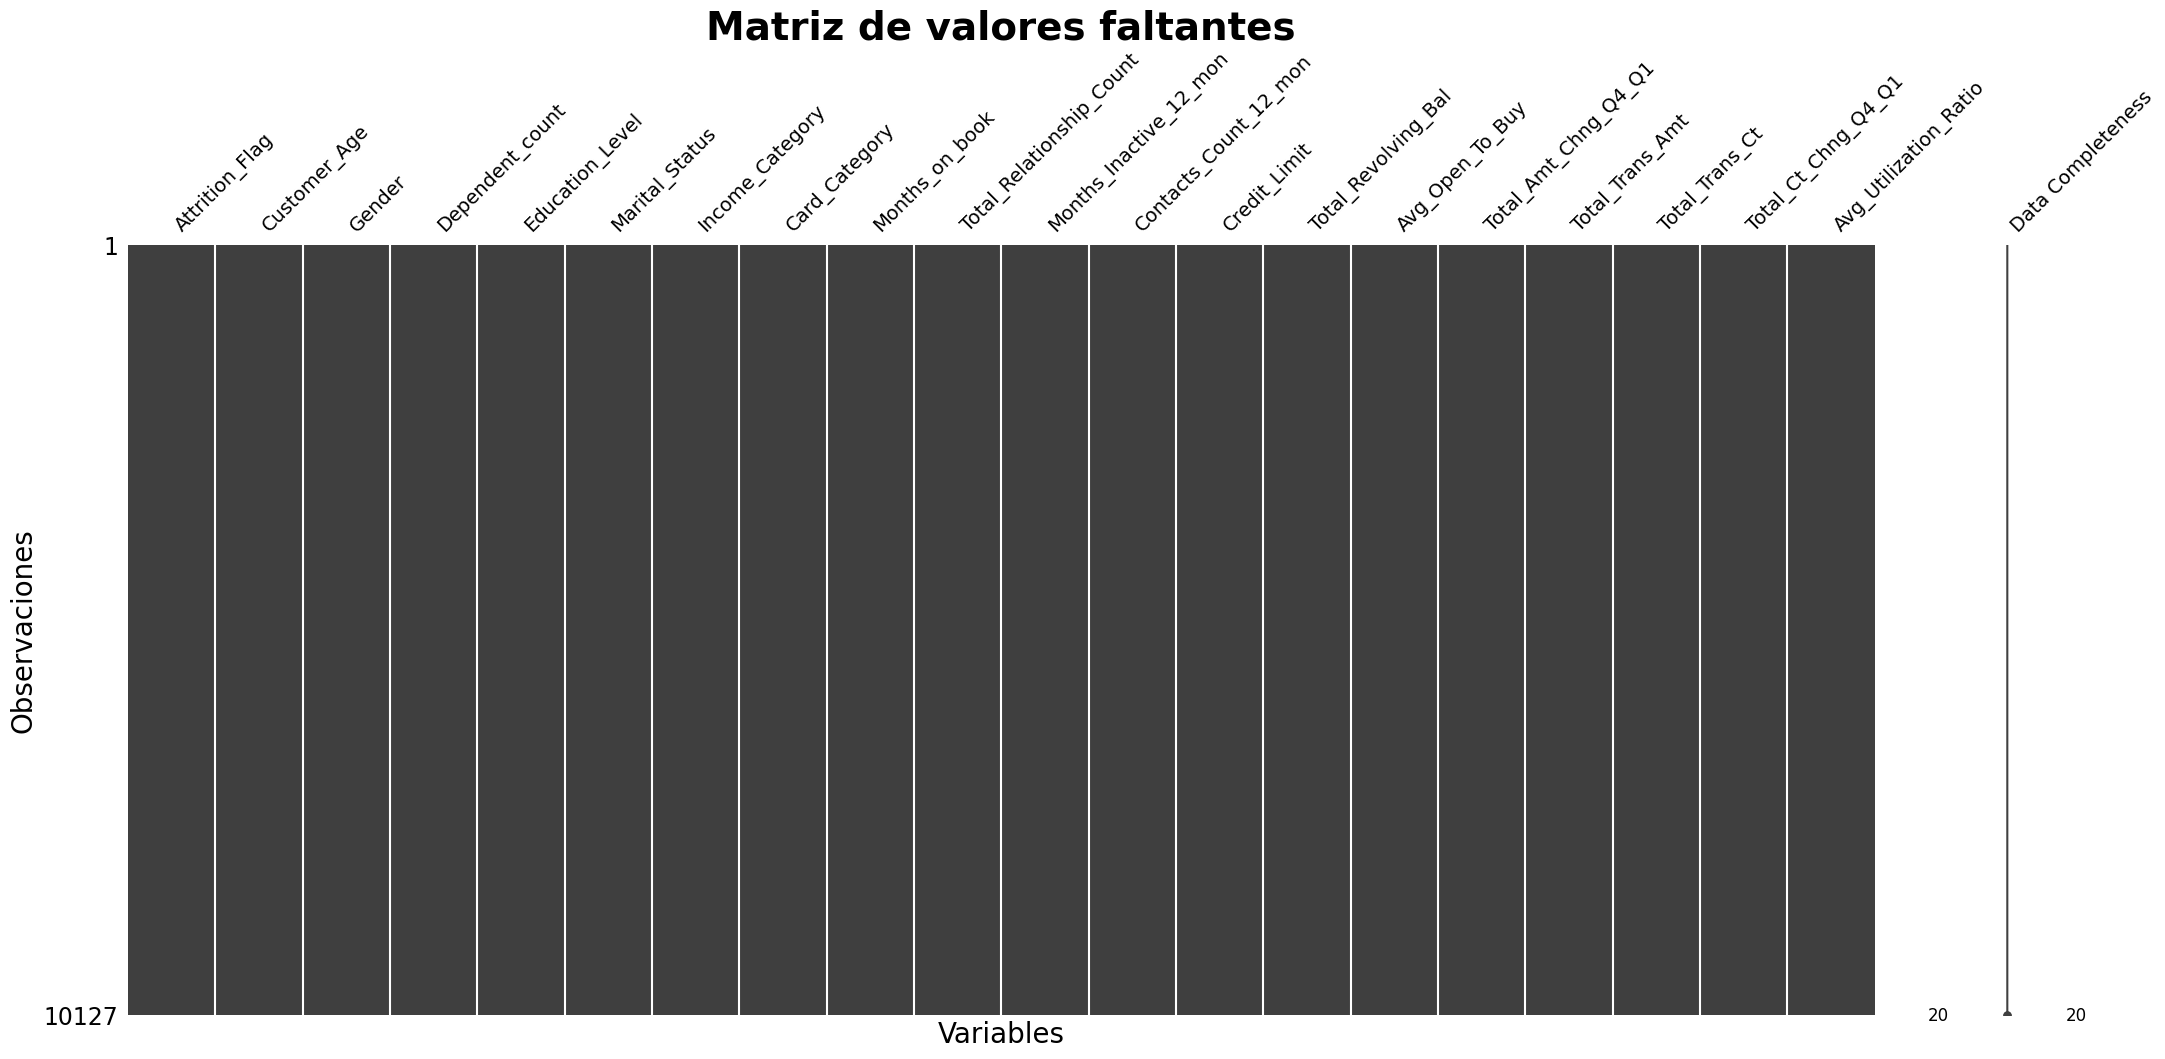

In [7]:
plt.figure(figsize=(10,8))
msno.matrix(Bankchurners, fontsize=14,
            labels=True,
            sparkline=True
            )
plt.title('Matriz de valores faltantes',
          fontsize=28,
          fontweight='bold',
          color="black"
          )
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)

plt.show()

*Como se puede observar, la base de datos no tiene datos nulos o faltantes.*

**Verificación Duplicados**

In [8]:
duplicados = Bankchurners.duplicated()
num_duplicados = sum(duplicados)

print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


*No hay filas duplicadas en la base de datos.*

### **Análisis de variables categóricas**

**Columnas categóricas y numéricas**



In [9]:
cat_col = [x for x in Bankchurners.columns if Bankchurners[x].dtype == 'O'] #categóricas que no contengan números
num_col = [x for x in Bankchurners.columns if x not in cat_col] #numéricas lo contrario.

print('Columnas_Categoricas : {} \n\
Columnas_Numericas : {}'.format(len(cat_col), len(num_col)))

Columnas_Categoricas : 6 
Columnas_Numericas : 14


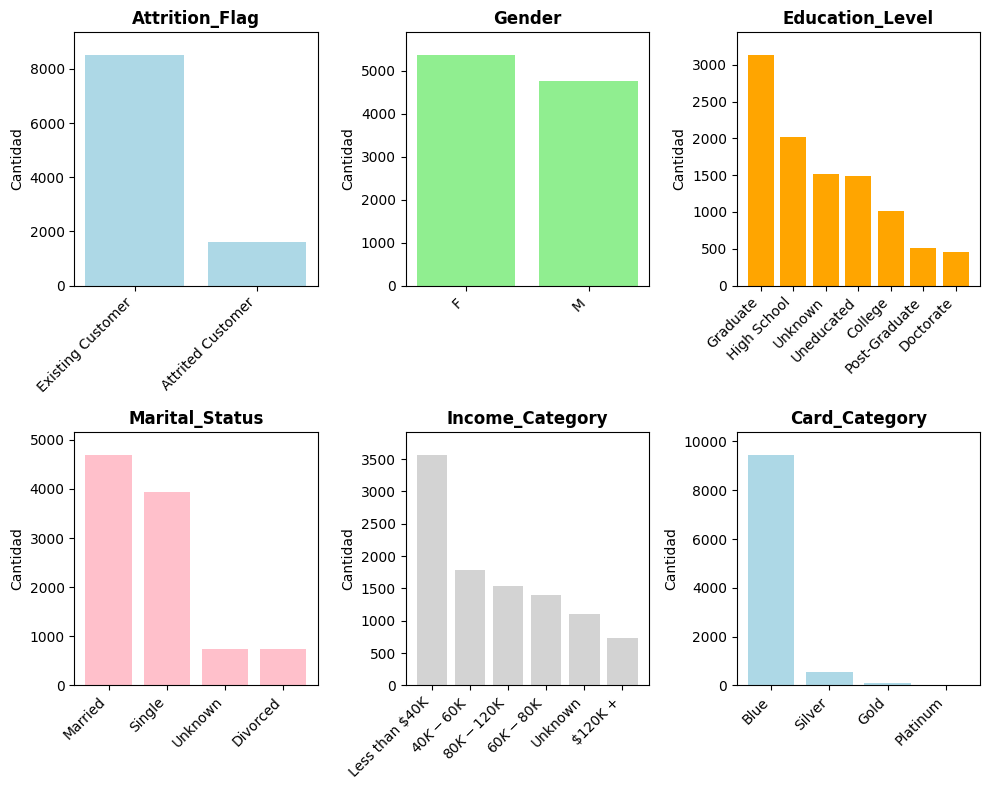

In [10]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)

colors = ['lightblue', 'lightgreen', 'orange', 'pink', 'lightgray']

for i, var in enumerate(cat_col):
    tmp = Bankchurners[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var], color=colors[i % len(colors)])
    ax.set_title(var, fontweight='bold')
    ax.set_xticks(range(len(tmp['index'])))
    ax.set_xticklabels(tmp['index'], rotation=45, ha='right')
    ax.set_ylim(0, max(tmp[var]) * 1.1)
    ax.set_ylabel('Cantidad')

fig.tight_layout()
plt.show()


_Un breve análisis de las variables categóricas y su distribución en el dataset_

### **Análisis Nivel Educacional**

**Distribución Educacional**

In [11]:
Education_Counts = Bankchurners["Education_Level"].value_counts()

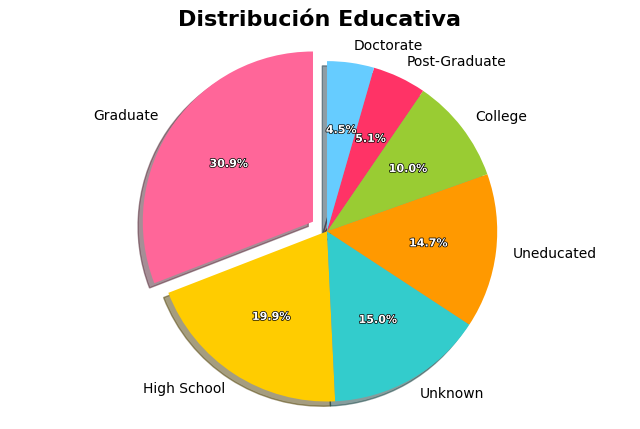

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
explode = (0.1, 0, 0, 0, 0, 0, 0)

wedges, texts, autotexts = ax.pie(Education_Counts,
                                  explode=explode,
                                  labels=Education_Counts.index,
                                  autopct='%1.1f%%',
                                  shadow=True,
                                  startangle=90,
                                  textprops={'fontsize': 10,},
                                  colors=['#FF6699', '#FFCC00', '#33CCCC', '#FF9900', '#99CC33', '#FF3366', '#66CCFF'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'), path_effects.Normal()])
    autotext.set_fontsize(8)

ax.set_title('Distribución Educativa', color='black', weight='bold', fontsize=16)
ax.axis('equal')

plt.show()

**Conclusiones:**

_Niveles educativos superiores: Los porcentajes combinados de graduados, escuela avanzada, post graduados y doctorado suman aproximadamente el 60,4% (30,9% + 19,9% + 5,1% + 4,5%). Esto indica que una proporción significativa de la muestra o población tiene algún nivel de educación más allá de la educación secundaria._

_Importancia de la educación desconocida: La categoría "desconocido" representa el 15% de la distribución educativa. Esto sugiere que existe un segmento de la muestra o población del cual no se tiene información precisa sobre su nivel educativo. Puede ser relevante investigar y recopilar más datos sobre esta categoría para obtener una imagen más completa._

_Considerable presencia de individuos no educados: El 14,7% de la distribución educativa corresponde a individuos que no han completado una educación formal. Esto destaca la importancia de comprender las características y necesidades de este grupo en particular, ya que pueden requerir enfoques diferentes en términos de servicios financieros y estrategias de retención._

_Oportunidades para promover programas educativos: Dado que hay una proporción significativa de la muestra o población con niveles educativos más bajos, existe una posible oportunidad para ofrecer programas educativos o de formación que ayuden a mejorar las habilidades y el conocimiento de estas personas. Esto podría contribuir a su desarrollo personal y financiero, al tiempo que brinda una ventaja competitiva al banco en términos de retención de clientes._

**Distribución Educacional en base a nivel de ingresos**

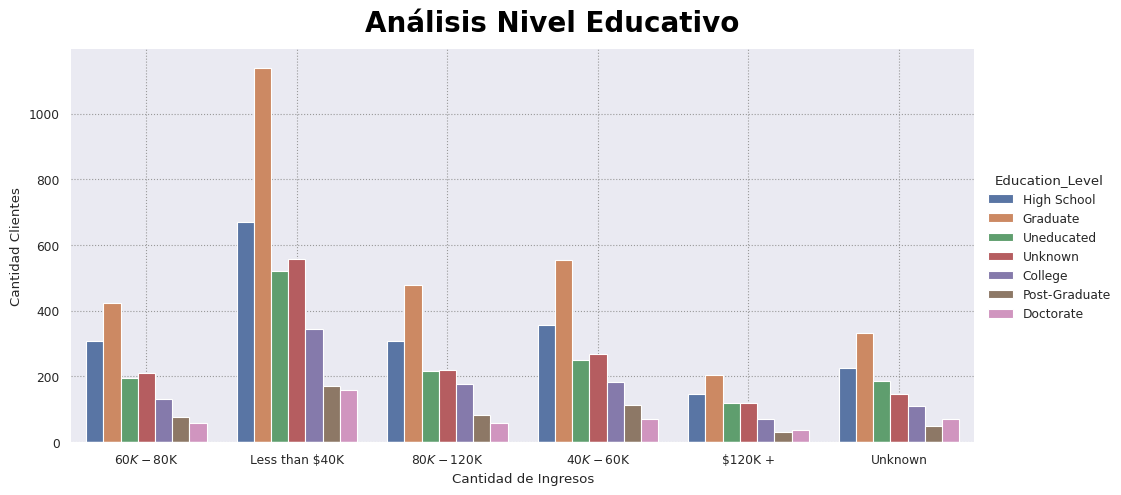

In [13]:
sns.set_style("darkgrid")
sns.set_context("paper")

ax = sns.catplot(x="Income_Category",
                 hue="Education_Level",
                 data=Bankchurners,
                 kind="count",
                 height=5, aspect=2,
                 palette="deep"
                )

ax.fig.subplots_adjust(top=.9)
ax.fig.suptitle('Análisis Nivel Educativo',
                color="black",
                weight="bold",
                fontsize=20
                )
ax.set(xlabel='Cantidad de Ingresos',
       ylabel='Cantidad Clientes'
       )
ax.set_titles(col_template="{col_name}")

ax.despine(left=True)
plt.grid(color='.6', linestyle=':')
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.linewidth'] = 0.5

plt.show()

_En el gráfico observado la cartera de clientes esta compuesta mayormente por clientes con ingresos menores a $40k y en su mayoría graduados_

**Influencia educacional en relación al banco**

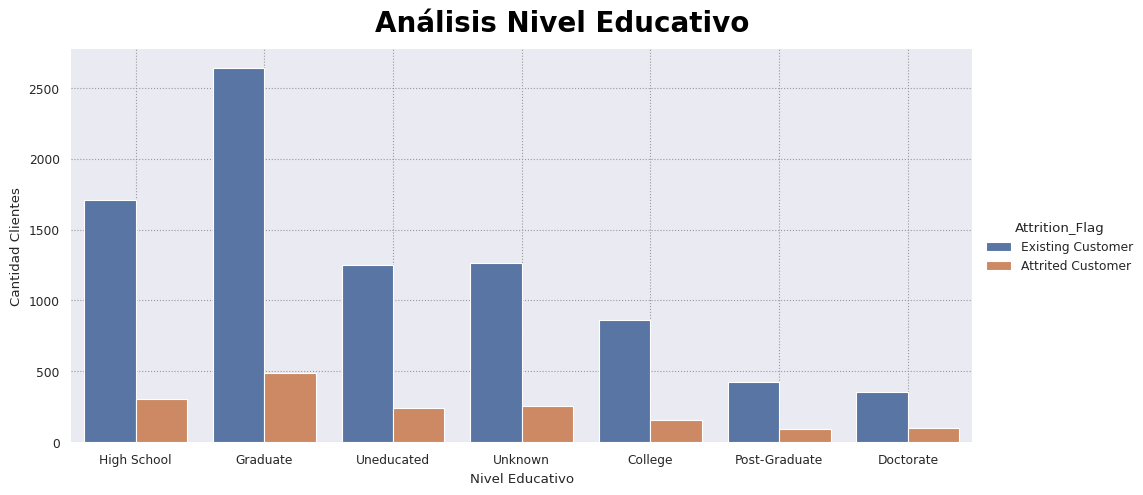

In [14]:
ax = sns.catplot(x="Education_Level", hue="Attrition_Flag", data=Bankchurners, kind="count", height=5, aspect=2, palette="deep")
ax.fig.suptitle('Análisis Nivel Educativo', color="black", weight="bold", fontsize=20)
ax.fig.subplots_adjust(top=.9)
ax.set(xlabel='Nivel Educativo', ylabel='Cantidad Clientes')
ax.set_titles(col_template="{col_name}")
ax.despine(left=True)
plt.grid(color='.6', linestyle=':')
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.linewidth'] = 0.5

plt.show()

_En base al gráfico obtenido, no hay una marcada diferencia entre el nivel educativo del cliente y la relación con el banco. Se observan porcentajes similares en cada categoría._

### **Análisis Variable Edad**

**Edad media**

In [15]:
Edad_Media = Bankchurners["Customer_Age"].mean()
Edad_Media_2 = round(Edad_Media, 2)

print("Edad Media:", Edad_Media_2, "Años")

Edad Media: 46.33 Años


**Rangos Cuartiles**

In [16]:
q1 = Bankchurners['Customer_Age'].quantile(0.25)
q2 = Bankchurners['Customer_Age'].median()
q3 = Bankchurners['Customer_Age'].quantile(0.75)

iqr = q3 - q1

print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("Rango intercuartil:", iqr)

Q1: 41.0
Q2: 46.0
Q3: 52.0
Rango intercuartil: 11.0


**Promedio Edades**

In [17]:
age_mean = Bankchurners.groupby('Gender')['Customer_Age'].mean().round(2)

print("Promedio de edad Hombres:", age_mean['M'],"Años")
print("Promedio de edad Mujeres:", age_mean['F'],"Años")

Promedio de edad Hombres: 46.18 Años
Promedio de edad Mujeres: 46.46 Años


**Boxsplot variable edad**

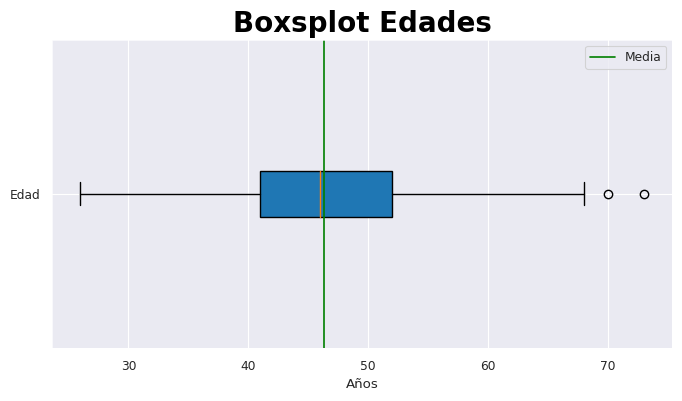

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot(x=Bankchurners["Customer_Age"],
           patch_artist= True,
           vert= False,
           labels=["Edad"]
           )
ax.set_title("Boxsplot Edades",
             color = "black",
             weight = "bold",
             fontsize=20
             )
ax.set_xlabel('Años')
plt.axvline(x=Edad_Media, color="g", label="Media")
plt.legend()

plt.show()

_Se utilizó la línea verde por donde ocupa el valor la media_

In [19]:
skewness = Bankchurners['Customer_Age'].skew()

display(skewness.round(3))

-0.034

_Un sesgo (skewness) de -0.034 indica que la distribución de edades de los clientes en la columna 'Customer_Age' está ligeramente sesgada hacia la izquierda, aunque la asimetría es muy pequeña. Esto significa que hay ligeramente más valores en el extremo izquierdo de la distribución (edades más jóvenes) que en el extremo derecho (edades más viejas), pero en general la distribución parece bastante simétrica._

**Una mejor vista Grafica de la variable**

Text(0.5, 1.0, 'Cantidad clientes según edad')

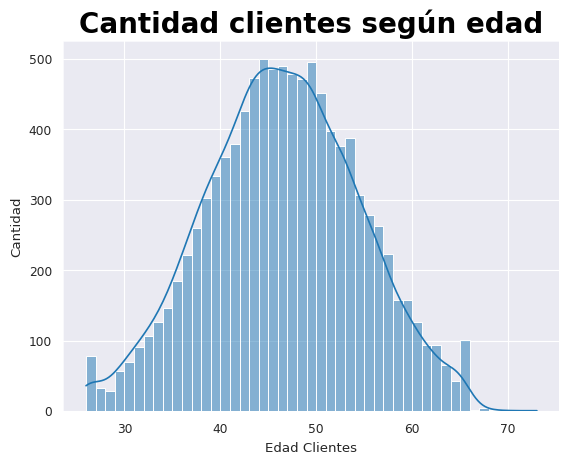

In [20]:
ax = sns.histplot(Bankchurners.Customer_Age,kde=True,)
ax.set(xlabel='Edad Clientes',
       ylabel='Cantidad'
       )
ax.set_title("Cantidad clientes según edad",
             color = "black",
             weight = "bold",
             fontsize=20
             )

In [21]:
print(f"Desviacion Estandar: {Bankchurners['Customer_Age'].std().round(2)}")

Desviacion Estandar: 8.02


_El resultado de la desviación estándar de las edades de los clientes es de 8.02 años aproximadamente. Esto sugiere que las edades de los clientes en la base de datos están relativamente agrupadas alrededor de la media (promedio) de las edades, pero aún hay cierta variabilidad en las edades de los clientes en la base de datos._

[Text(0.5, 0, 'Edad Clientes'), Text(0, 0.5, 'Cantidad')]

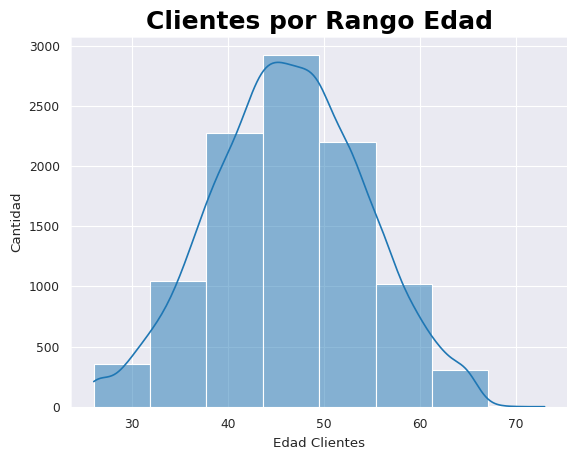

In [22]:
ax = sns.histplot(Bankchurners.Customer_Age,
                  kde=True,
                  bins=int(Bankchurners['Customer_Age'].std())
                  )
ax.set_title("Clientes por Rango Edad",
             color = "black",
             weight = "bold",
             fontsize=18
             )
ax.set(xlabel='Edad Clientes',
       ylabel='Cantidad'
       )

_Por lo que puede observarse en el histograma, entre los 40 a 50 años se encuentra la mayor cantidad de clientes (la media se encuentra en 46,32)_

In [23]:
Bankchurners['Customer_Age_period'] = pd.cut(np.array(Bankchurners['Customer_Age']), bins=int(Bankchurners.Customer_Age.std()), precision=0)

**Analisis Bivariado**

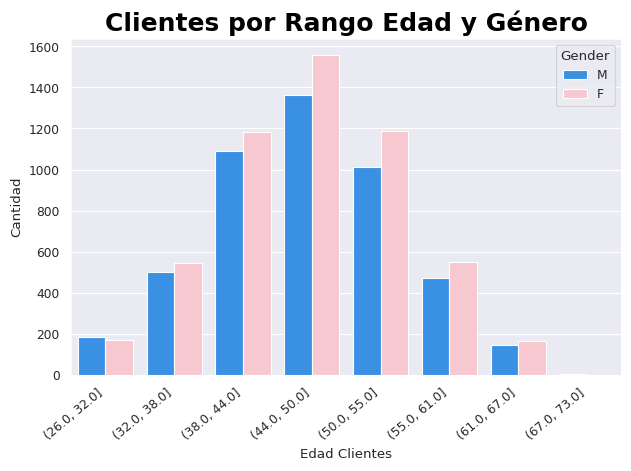

In [24]:
ax = sns.countplot(x="Customer_Age_period",
                   hue='Gender',
                   data=Bankchurners,
                   palette=['dodgerblue',"pink"]
                   )
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=40,
                   ha="right")
ax.set_title("Clientes por Rango Edad y Género",
             color = "black",
             weight = "bold",
             fontsize=18
             )
ax.set(xlabel='Edad Clientes',
      ylabel='Cantidad')

plt.tight_layout()

_El número de hombres y mujeres aumenta a medida que aumenta la edad hasta el grupo de 44-50 años, donde alcanza su punto máximo tanto para hombres como para mujeres.
Después del grupo de 44-50 años, el número de hombres y mujeres tiende a disminuir gradualmente a medida que aumenta la edad._

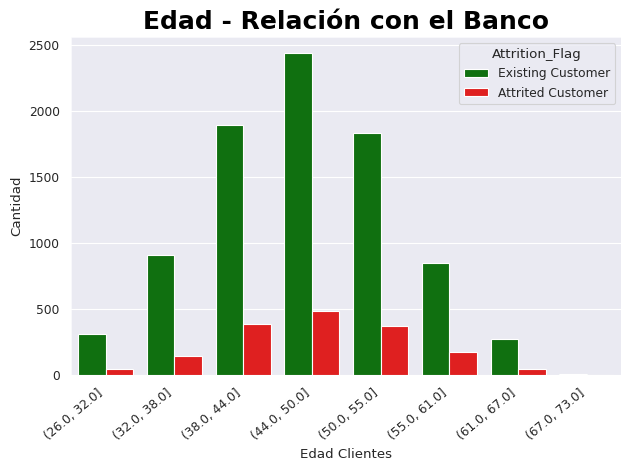

In [25]:
ax = sns.countplot(x="Customer_Age_period",
                   hue='Attrition_Flag',
                   data=Bankchurners,
                   palette=['green',"red"]
                   )
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=40,
                   ha="right"
                   )
ax.set_title("Edad - Relación con el Banco",
             color = "black",
             weight = "bold",
             fontsize=18
             )
ax.set(xlabel='Edad Clientes',
       ylabel='Cantidad'
       )

plt.tight_layout()

_En el gráfico puede observarse que no hay tendencia de edad entre clientes existentes y ex-clientes. Es decir no es un parámetro relevante, ambos atributos del gráfico tienen el mismo comportamiento._

### **Análisis Variable Género**

In [26]:
Edad_Genero = pd.crosstab(Bankchurners['Customer_Age'],
                          Bankchurners["Gender"].map({"M": "Hombre", "F": "Mujer"}),
                          margins = True,
                          margins_name = "Total",
                          )

Edad_Genero.head()

Gender,Hombre,Mujer,Total
Customer_Age,,,
26,39,39,78
27,13,19,32
28,16,13,29
29,34,22,56
30,37,33,70


*Tabla Cruzada: Edad y Género. Para ver la cantidad de personas segun el genero en una edad determinada*

**Analisis Bivariado del Género**

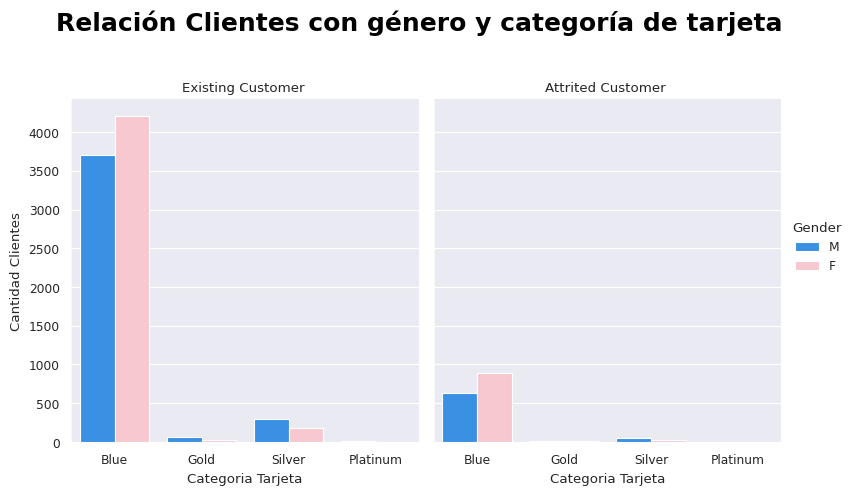

In [27]:
ax = sns.catplot(x="Card_Category",
                 hue="Gender",
                 col="Attrition_Flag",
                 data=Bankchurners,
                 kind="count",
                 height=5,
                 aspect=.8,
                 palette=['dodgerblue',"pink"]
                 )

ax.fig.suptitle('Relación Clientes con género y categoría de tarjeta',
                color = "black",
                weight = "bold",
                fontsize=18
                )
ax.fig.subplots_adjust(top=.8)
ax.set(xlabel='Categoria Tarjeta',
       ylabel='Cantidad Clientes'
       )
ax.set_titles(col_template="{col_name} ")

_Por lo que se observa en la gráfica, no hay un patron visible que pueda determinar si cierto tipo de tarjeta lleva al cliente a darse de baja en el banco, el porcentaje a simple vista es muy similar._

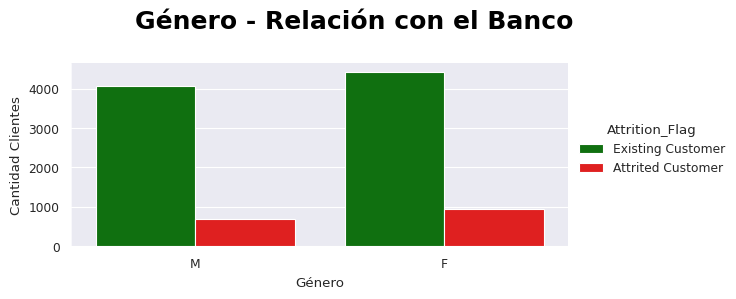

In [28]:
ax = sns.catplot(x="Gender",
                hue="Attrition_Flag",
                data=Bankchurners,
                kind="count",
                height=3,
                aspect=2,
                palette=['green',"red"]
                )
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('Género - Relación con el Banco',
            color = "black",
             weight = "bold",
             fontsize=18,
             )
ax.fig.subplots_adjust(top=.8)
ax.set(ylabel='Cantidad Clientes',
       xlabel= "Género")
ax.set_titles(col_template="{col_name} ")

_Se observa que el porcentaje de mujeres y hombres que se retiran en la tarjeta es muy similar, no se puede concluir una relación en base al género._

### **Análisis Variable Límite de crediticio**

[Text(0.5, 0, 'Edad Clientes'), Text(0, 0.5, 'Limite crediticio')]

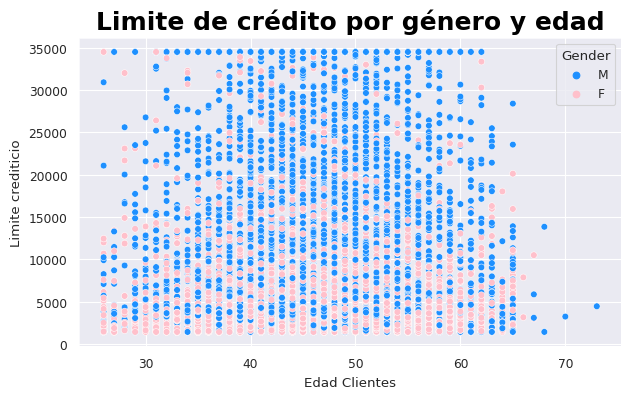

In [29]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(x= Bankchurners['Customer_Age'],
                y = Bankchurners['Credit_Limit'],
                data=Bankchurners,
                hue="Gender",
                palette=['dodgerblue',"pink"],
                )
ax.set_title("Limite de crédito por género y edad",
            color = "black",
             weight = "bold",
             fontsize=18,
             )
ax.set(xlabel='Edad Clientes',
      ylabel='Limite crediticio'
      )


In [30]:
Bankchurners['Gender'] = Bankchurners['Gender'].replace({'M': 'Hombre', 'F': 'Mujer'})
mean_credit_limit = Bankchurners.groupby('Gender')['Credit_Limit'].mean().round(2)

print(mean_credit_limit)

Gender
Hombre    12685.67
Mujer      5023.85
Name: Credit_Limit, dtype: float64


_El análisis de la tabla revela un patrón evidente: los hombres tienen límites de crédito más altos que las mujeres en todos los grupos de edad. Esto se puede observar visualmente en el gráfico, donde los valores correspondientes a los hombres son consistentemente mayores que los de las mujeres en cada rango de edad._

_Al realizar un análisis simple de agrupamiento (GroupBy), se ha confirmado una diferencia en los límites de crédito entre hombres y mujeres. En promedio, las mujeres tienen un límite de crédito de aproximadamente $5023, mientras que los hombres tienen un límite de crédito promedio de alrededor de $12685._

### **Heatmap entre 2 variables INT**

<Axes: >

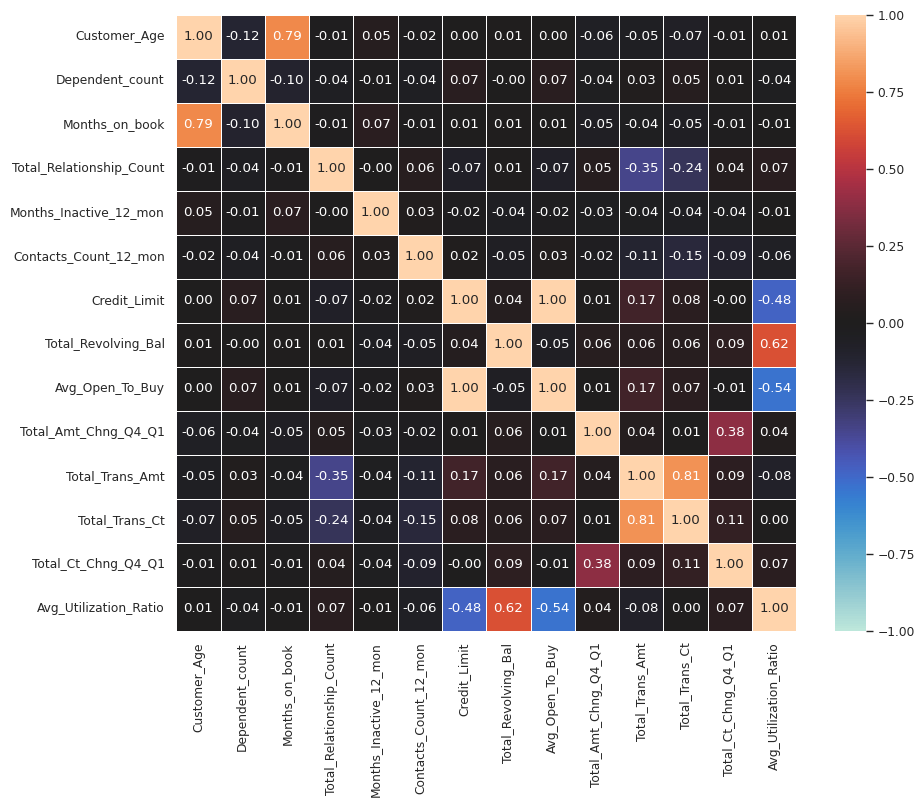

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(Bankchurners[num_col].corr(),
            vmin=-1.0,
            vmax=1.0,
            linewidths=0.5,
            cmap='icefire',
            annot=True,
            fmt='.2f',
            )

_Por medio del heatmap puede observarse poca relacion entre variables numéricas (INT)._

#### **Relacion de edad - Meses operando**

Text(0, 0.5, 'Meses')

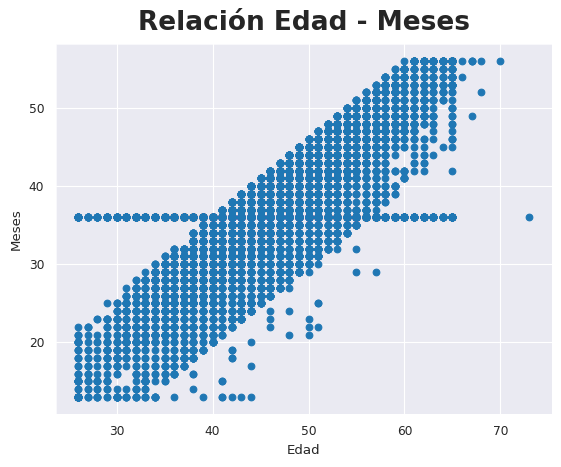

In [32]:
plt.scatter(Bankchurners['Customer_Age'],Bankchurners['Months_on_book'])
plt.title("Relación Edad - Meses",
           fontsize=19,
           verticalalignment='bottom',
             weight = "bold",
           )
plt.xlabel("Edad")
plt.ylabel("Meses")

_Conclusión simple de dicho grafico de relacion entre la edad y los meses activos del cliente. Mientras mas edad tiene ese cliente tiende a tener mayor cantidad de meses operando con la tarjeta, de igualmanera pueden observarse pocos outliers._

In [33]:
Bankchurners.shape

(10127, 21)

In [34]:
filtered_data = Bankchurners[(Bankchurners['Months_on_book'] == 36)]
result_table = filtered_data[['Customer_Age', 'Months_on_book', "Attrition_Flag"]]

print(result_table)

       Customer_Age  Months_on_book     Attrition_Flag
2                51              36  Existing Customer
5                44              36  Existing Customer
8                37              36  Existing Customer
9                48              36  Existing Customer
12               56              36  Existing Customer
...             ...             ...                ...
10115            38              36  Existing Customer
10116            46              36  Existing Customer
10118            50              36  Attrited Customer
10124            44              36  Attrited Customer
10125            30              36  Attrited Customer

[2463 rows x 3 columns]


_De 10127 filas, 2463 contienen 36 meses. En muchas situaciones, las tarjetas de crédito suelen tener una duración de vencimiento de 3 años. Por lo tanto, tener un valor de 36 meses en la columna 'Months_on_book' podría indicar que está relacionado con el período de vencimiento de las tarjetas de crédito. Supuesto considerado, ya que se desconoce al ser una base de datos vieja y sin contactos con el lugar de origen._

#### **Relacion cantidad de operaciones efectuadas segun comportamiento**

[Text(0.5, 0, 'Avg Utilization Ratio'), Text(0, 0.5, 'Total Revolving Ball')]

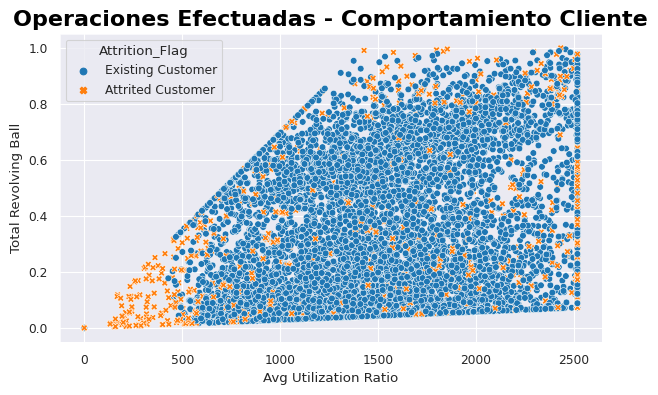

In [35]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(x= Bankchurners['Total_Revolving_Bal'],
                y = Bankchurners['Avg_Utilization_Ratio'],
                data=Bankchurners,
                hue="Attrition_Flag",
                style="Attrition_Flag",
                )
ax.set_title("Operaciones Efectuadas - Comportamiento Cliente",
            color = "black",
            weight = "bold",
            fontsize=16,
             )
ax.set(xlabel='Avg Utilization Ratio',
      ylabel='Total Revolving Ball',
      )

_En conclusión, al analizar el gráfico de dispersión bi-variado, se puede observar una tendencia clara: la mayoría de los clientes que solicitan la baja de la tarjeta de crédito tienen un menor número de operaciones efectuadas en el último período de tiempo._

## Seleccion de características

### Creación de variables sintéticas

In [36]:
Bankchurners['Utilizacion_Cred_Promedio'] = Bankchurners['Avg_Open_To_Buy'] / Bankchurners['Credit_Limit']

Bankchurners['Promedio_Actividad_12_meses'] = Bankchurners['Months_Inactive_12_mon'] + Bankchurners['Contacts_Count_12_mon']

In [37]:
bins = [0, 25, 60, Bankchurners['Customer_Age'].max()]
labels = ['Joven', 'Adulto', 'Mayor']
Bankchurners['Edad_Categorizada'] = pd.cut(Bankchurners['Customer_Age'], bins=bins, labels=labels, include_lowest=True)

In [38]:
Bankchurners.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_period,Utilizacion_Cred_Promedio,Promedio_Actividad_12_meses,Edad_Categorizada
0,Existing Customer,45,Hombre,3,High School,Married,$60K - $80K,Blue,39,5,...,11914.0,1.335,1144,42,1.625,0.061,"(44.0, 50.0]",0.938776,4,Adulto
1,Existing Customer,49,Mujer,5,Graduate,Single,Less than $40K,Blue,44,6,...,7392.0,1.541,1291,33,3.714,0.105,"(44.0, 50.0]",0.895349,3,Adulto
2,Existing Customer,51,Hombre,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,2.594,1887,20,2.333,0.000,"(50.0, 55.0]",1.000000,1,Adulto
3,Existing Customer,40,Mujer,4,High School,Unknown,Less than $40K,Blue,34,3,...,796.0,1.405,1171,20,2.333,0.760,"(38.0, 44.0]",0.240266,5,Adulto
4,Existing Customer,40,Hombre,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,2.175,816,28,2.500,0.000,"(38.0, 44.0]",1.000000,1,Adulto


### Preparación

In [39]:
le = LabelEncoder()

Bankchurners['Education_Level'] = le.fit_transform(Bankchurners['Education_Level'])
Bankchurners['Income_Category'] = le.fit_transform(Bankchurners['Income_Category'])
Bankchurners['Attrition_Flag'] = le.fit_transform(Bankchurners['Attrition_Flag'])

*Se aplico label encoding sobre las variables Education_Level e Income_Category. Tambien se aplico sobre Attrition_Flag (variable objetivo de decision), ya que aplicando onehot la misma devuelve error al seleccionarla como objetivo (Y)*

In [40]:
columns_to_encode = ['Marital_Status',
                     'Gender',
                     'Card_Category',
                     'Edad_Categorizada',
                     ]

_Luego de aplico getdummies a las variables restantes categoricas que eran igual o menores a 4._

In [41]:
Bankchurners = Bankchurners.drop(columns=['Customer_Age_period'])

_Se Hizo un drop de dicha columna y Customer_Age_period (que fue creada para analisis graficos)_

In [42]:
BankchurnersE = pd.get_dummies(Bankchurners, columns=columns_to_encode)

In [43]:
BankchurnersE.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Marital_Status_Unknown,Gender_Hombre,Gender_Mujer,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Edad_Categorizada_Joven,Edad_Categorizada_Adulto,Edad_Categorizada_Mayor
0,1,45,3,3,2,39,5,1,3,12691.0,...,0,1,0,1,0,0,0,0,1,0
1,1,49,5,2,4,44,6,1,2,8256.0,...,0,0,1,1,0,0,0,0,1,0
2,1,51,3,2,3,36,4,1,0,3418.0,...,0,1,0,1,0,0,0,0,1,0
3,1,40,4,3,4,34,3,4,1,3313.0,...,1,0,1,1,0,0,0,0,1,0
4,1,40,3,5,2,21,5,1,0,4716.0,...,0,1,0,1,0,0,0,0,1,0


_Verificación que toda la DB este en valores numéricos._

### Reducción dimensionalidad

**Entrenamiento modelo de bosque aleatorio para determinar la importancia de cada característica**

In [44]:
# Divido los datos en características y variable objetivo (Y)
X = BankchurnersE.drop(['Attrition_Flag'], axis=1)
y = BankchurnersE['Attrition_Flag']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Entreno un modelo de bosque aleatorio para determinar la importancia de cada característica
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Importancia de cada característica**

In [47]:
importances = rf.feature_importances_

In [48]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

In [49]:
feature_importances = feature_importances.sort_values('importance', ascending=False)

In [50]:
print(feature_importances.round(4))

                        feature  importance
12              Total_Trans_Amt      0.1712
13               Total_Trans_Ct      0.1624
14          Total_Ct_Chng_Q4_Q1      0.0992
9           Total_Revolving_Bal      0.0837
5      Total_Relationship_Count      0.0603
16    Utilizacion_Cred_Promedio      0.0573
11         Total_Amt_Chng_Q4_Q1      0.0552
15        Avg_Utilization_Ratio      0.0497
8                  Credit_Limit      0.0335
0                  Customer_Age      0.0319
10              Avg_Open_To_Buy      0.0299
17  Promedio_Actividad_12_meses      0.0284
4                Months_on_book      0.0255
6        Months_Inactive_12_mon      0.0204
7         Contacts_Count_12_mon      0.0199
1               Dependent_count      0.0133
2               Education_Level      0.0118
3               Income_Category      0.0110
22                Gender_Hombre      0.0078
23                 Gender_Mujer      0.0068
19       Marital_Status_Married      0.0056
20        Marital_Status_Single 

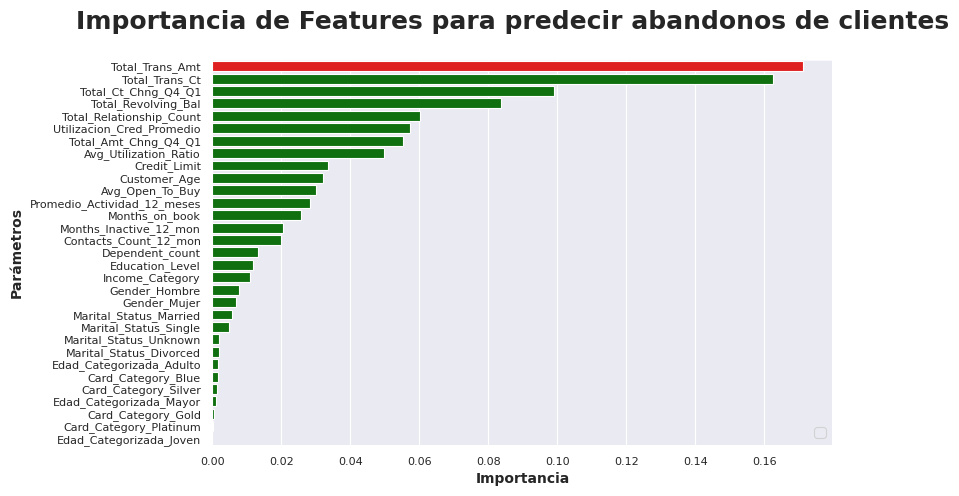

In [51]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

values = feature_importances.importance
sns.barplot(y=feature_importances.feature,
            x=values,
            palette=['green' if (x < max(values)) else 'red' for x in values], #Color Rojo la variable maxima
            ax=ax
            )

fig.suptitle("Importancia de Features para predecir abandonos de clientes", fontsize=18, fontweight='bold')
ax.set_xlabel("Importancia", fontsize=10, fontweight='bold')
ax.set_ylabel("Parámetros", fontsize=10, fontweight='bold')
ax.tick_params(labelsize=8)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc="lower right", fontsize=10)

plt.show()

_Esta gráfica resalta la importancia de enfocarse en variables como el importe total de las transacciones realizadas por los clientes al predecir su comportamiento, mientras que por otro lado la categoría de tarjeta puede tener un impacto menos significativo en la predicción. Estos hallazgos pueden ser útiles para desarrollar estrategias y modelos de predicción más precisos y efectivos en el ámbito del comportamiento del cliente. Por este motivo se decidió tener en cuenta las 13 principales caracteristicas._

In [52]:
important_features = feature_importances['feature'][:13].tolist()

In [53]:
NuevoDF = BankchurnersE[important_features + ['Attrition_Flag']] # Agrego nuevamente la columna Attrition Flag

In [54]:
NuevoDF.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Relationship_Count,Utilizacion_Cred_Promedio,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit,Customer_Age,Avg_Open_To_Buy,Promedio_Actividad_12_meses,Months_on_book,Attrition_Flag
0,1144,42,1.625,777,5,0.938776,1.335,0.061,12691.0,45,11914.0,4,39,1
1,1291,33,3.714,864,6,0.895349,1.541,0.105,8256.0,49,7392.0,3,44,1
2,1887,20,2.333,0,4,1.000000,2.594,0.000,3418.0,51,3418.0,1,36,1
3,1171,20,2.333,2517,3,0.240266,1.405,0.760,3313.0,40,796.0,5,34,1
4,816,28,2.500,0,5,1.000000,2.175,0.000,4716.0,40,4716.0,1,21,1


In [55]:
NuevoDF.shape

(10127, 14)

Nuevo DB con las columnas mas relevantes y la variable objetivo (Attrition_Flag)

## Entrenamiento Modelo Random Forest Classifier

In [56]:
# Divido los datos en características (X) y variable objetivo (y)
X = NuevoDF.drop(['Attrition_Flag'], axis=1)
y = NuevoDF['Attrition_Flag']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

_Divido los datos en conjuntos de entrenamiento y prueba. En este caso proporciono 70% para el conjunto de entrenamiento y el 30% para el conjunto de prueba._

In [58]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluación del modelo**

In [59]:
# Metricas de evaluación
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [60]:
print('Accuracy: ', round(accuracy, 4))
print('Precision: ', round(precision, 4))
print('Recall: ', round(recall, 4))
print('F1 score: ', round(f1, 4))
print('ROC AUC score: ', round(roc_auc, 4))

Accuracy:  0.9569
Precision:  0.9646
Recall:  0.9847
F1 score:  0.9745
ROC AUC score:  0.8996


Accuracy: El 95.69% de las predicciones son correctas en el conjunto de prueba.

Precision: El 96.46% de las instancias clasificadas como positivas son realmente positivas.

Recall: El 98.47% de las instancias positivas en el conjunto de prueba fueron correctamente identificadas.

F1-score: Una métrica que combina tanto la precisión como el recall en una sola medida. En este caso, 97.45% representa un buen equilibrio entre precisión y recall.

ROC AUC: El área bajo la curva ROC es 89.96%, lo que indica un buen rendimiento de clasificación, aunque podría haber margen de mejora.

**Metricas a comparar con otros modelos**

In [61]:
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))
print("Classification Report:\n", classification_rep)

Accuracy: 0.9569
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       496
           1       0.96      0.98      0.97      2543

    accuracy                           0.96      3039
   macro avg       0.94      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [62]:
X_test

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Relationship_Count,Utilizacion_Cred_Promedio,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit,Customer_Age,Avg_Open_To_Buy,Promedio_Actividad_12_meses,Months_on_book
3781,3734,64,0.882,1508,4,0.495821,0.703,0.504,2991.0,48,1483.0,7,39
2922,4010,79,0.717,1569,5,0.284215,0.706,0.716,2192.0,59,623.0,9,53
5070,4727,67,0.914,987,4,0.430796,0.879,0.569,1734.0,37,747.0,6,36
7246,4973,74,0.850,1516,4,0.683243,0.940,0.317,4786.0,47,3270.0,5,36
623,1454,35,0.522,2170,3,0.415724,0.524,0.584,3714.0,42,1544.0,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,4354,70,0.707,900,5,0.430019,0.592,0.570,1579.0,49,679.0,6,30
9535,13578,105,0.615,1662,1,0.951848,0.751,0.048,34516.0,39,32854.0,5,36
4638,3331,74,0.682,2465,4,0.449777,0.772,0.550,4480.0,56,2015.0,6,48
1166,2064,33,1.062,1591,6,0.414428,1.596,0.586,2717.0,38,1126.0,7,36


**Prueba predicciones ejemplos**

In [63]:
ejemplos = [
    {
        'Total_Trans_Amt': 1500,
        'Total_Trans_Ct': 35,
        'Total_Ct_Chng_Q4_Q1': 0.700,
        'Total_Revolving_Bal': 1600,
        'Total_Relationship_Count': 3,
        'Utilizacion_Cred_Promedio': 0.45645,
        'Total_Amt_Chng_Q4_Q1': 0.6705,
        'Avg_Utilization_Ratio': 0.654,
        'Credit_Limit': 3000,
        'Customer_Age': 40,
        'Avg_Open_To_Buy': 620,
        'Promedio_Actividad_12_meses': 7,
        'Months_on_book': 35,
    },
    {
        'Total_Trans_Amt': 800,
        'Total_Trans_Ct': 35,
        'Total_Ct_Chng_Q4_Q1': 0.700,
        'Total_Revolving_Bal': 1600,
        'Total_Relationship_Count': 3,
        'Utilizacion_Cred_Promedio': 0.45645,
        'Total_Amt_Chng_Q4_Q1': 0.6705,
        'Avg_Utilization_Ratio': 0.654,
        'Credit_Limit': 3000,
        'Customer_Age': 40,
        'Avg_Open_To_Buy': 620,
        'Promedio_Actividad_12_meses': 7,
        'Months_on_book': 35,
    }
]

for ejemplo in ejemplos:
    ejemplo_df = pd.DataFrame([ejemplo])
    prediccion = rf.predict(ejemplo_df)

    print("Predicción:", prediccion)
    print()

Predicción: [1]

Predicción: [0]



A modo de ejemplo para probar el alogritmo entrenado, se puede observar como la variable Total_Trans_Amt es la que mayor peso tiene sobre el modelo de decision, si varia el valor, el resultado cambia.

## Entrenamiento modelo SVM

In [64]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
y_pred = svm_model.predict(X_test)

**Evaluación del modelo**

In [66]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [67]:
print("Accuracy:", round(accuracy, 4))
print("Classification Report:\n", classification_rep)

Accuracy: 0.8776
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.44      0.54       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.73      3039
weighted avg       0.87      0.88      0.87      3039



## Entrenamiento KNN

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Especifica el número de vecinos
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred = knn_model.predict(X_test)

**Evaluación Modelo**

In [70]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("Classification Report:\n", classification_rep)

Accuracy: 0.8845
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.54      0.60       496
           1       0.91      0.95      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.80      0.75      0.77      3039
weighted avg       0.88      0.88      0.88      3039



**Conclusiones en primera instancia:**

Random Forest tiene el rendimiento general más alto en términos de accuracy y f1-score promedio (macro y weighted), lo que indica que es el algoritmo más equilibrado en términos de clasificación de ambas clases.

Aunque SVC tiene una alta precisión para la clase 1, su baja recall en la clase 0 indica que podría estar teniendo dificultades para clasificar esta clase.

KNN tiene un rendimiento similar al de Random Forest en términos de clasificación de ambas clases, pero en general, Random Forest parece ser más estable y confiable.

De este modo, se va trabajar y optimizar el modelo RF.

## Overfitting

Tener un valor cercano al 1.0 en todas las métricas de evaluación como es el caso, puede ser indicativo de un sobreajuste (OVERFITTING) del modelo. Es decir, el modelo está aprendiendo perfectamente los datos de entrenamiento y no hay una verdadera generalización a nuevos datos.

Para verificar si el modelo está sobreajustado, se puede utilizar una la validación cruzada que implica dividir los datos en conjuntos de entrenamiento y prueba múltiples veces y evaluar el modelo en cada división.


In [71]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

_En este caso entrena y evalúa el modelo de árbol de decisiones en cada una de las 5 divisiones de los datos y devuelve la precisión en cada iteración. Luego se calcula la media y la desviación estándar de la precisión para evaluar el modelo de manera más robusta._

In [72]:
print("Scores de Validación Cruzada:", [round(score, 3) for score in scores])
print("Promedio del Score de Validación Cruzada:", round(scores.mean(), 3))
print("Accuracy: %.2f (+/- %.2f)" % (round(scores.mean(), 3), round(scores.std() * 2, 3)))

Scores de Validación Cruzada: [0.959, 0.961, 0.964, 0.956, 0.965]
Promedio del Score de Validación Cruzada: 0.961
Accuracy: 0.96 (+/- 0.01)


Los resultados de la validación cruzada son los siguientes:

_Puntuaciones de Validación Cruzada Individual: [0.959, 0.961, 0.964, 0.956, 0.965]_

_Promedio de la Puntuación de Validación Cruzada: 0.961
Precisión Promedio con Intervalo de Confianza: 0.96 (+/- 0.01)_

_Las puntuaciones de validación cruzada individual representan la precisión obtenida por el modelo en cada uno de los cinco pliegues. El promedio de estas puntuaciones es 0.961, lo que sugiere un rendimiento general positivo en la capacidad de clasificación._

_El valor "Precisión Promedio con Intervalo de Confianza" (0.96 +/- 0.01) proporciona una estimación más completa de la precisión del modelo. Esto significa que, en promedio, podemos esperar una precisión en el rango de 0.95 a 0.97 en datos no vistos._

_Estos resultados nos indican que nuestro modelo de Random Forest muestra un buen rendimiento en la clasificación, con una precisión promedio alrededor del 96%. Además, la pequeña variabilidad entre las diferentes divisiones de los datos sugiere una consistencia en la capacidad de generalización del modelo._

## Optimización del modelo

**Grid Search**

In [73]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor puntuación de validación cruzada:", round(best_score, 4))

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Mejor puntuación de validación cruzada: 0.9616


**Random Search**

In [74]:
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor puntuación de validación cruzada:", round(best_score, 4))

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 99}
Mejor puntuación de validación cruzada: 0.9599


## Entrenamiento Modelo Óptimo

In [75]:
# hiperparámetros encontrados en Grid Search
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}

rf = RandomForestClassifier(**best_params)

# Entrenamiento con nuevos datos
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=150)

In [76]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", round(accuracy, 4))

Precisión en el conjunto de prueba: 0.9566


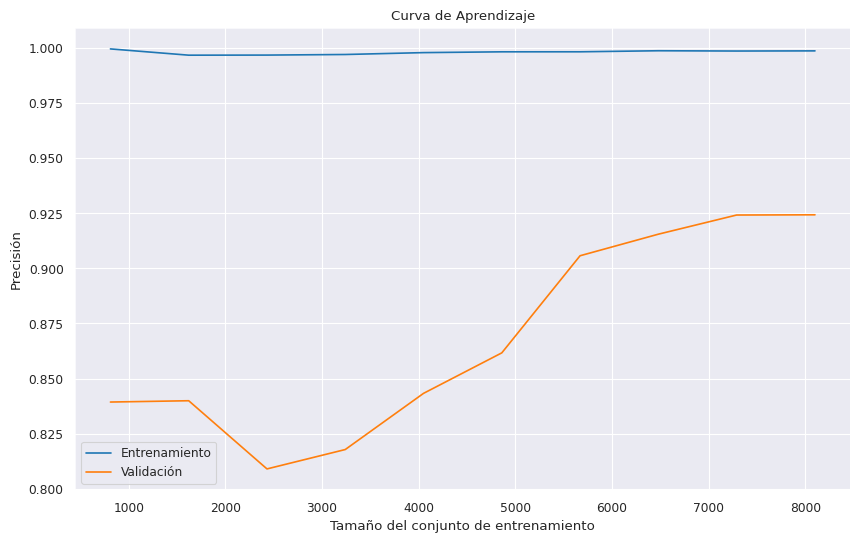

In [77]:
# Crear la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Entrenamiento')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()

_El modelo inicialmente mejora a medida que se proporcionan más datos para entrenar. Sin embargo, una vez que alcanza un cierto punto, el crecimiento en el rendimiento se ralentiza. Esto sugiere que agregar más datos de entrenamiento más allá de cierto punto tiene un impacto limitado en la mejora del rendimiento._

_Cuando la curva de validación se estabiliza a una alta precisión (0,925 en este caso), esto puede indicar que el modelo ha alcanzado su límite en términos de capacidad para aprender de los datos. A partir de cierto punto, agregar más datos o aumentar la complejidad del modelo puede tener un impacto limitado en la mejora del rendimiento._

In [78]:
# Nuevo grafico de barras (peso de variables)
importances = rf.feature_importances_
feature_names = X.columns

Text(0.5, 1.0, 'Importancia de Características')

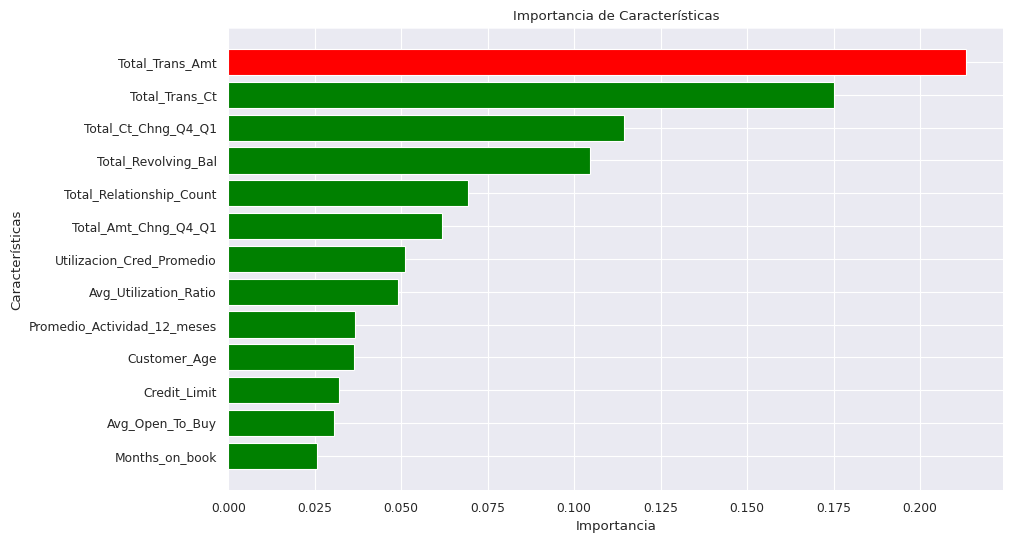

In [79]:
sorted_indices = np.argsort(importances)
sorted_importances = importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

colors = ['green' if i < max(importances) else 'red' for i in sorted_importances]

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_importances)), sorted_importances, color=colors, tick_label=sorted_feature_names)

plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de Características')

**Reducir la Complejidad Ajustando la Profundidad Máxima de los Árboles**

In [80]:
rf_low_depth = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)

rf_low_depth.fit(X_train, y_train)

accuracy_low_depth = rf_low_depth.score(X_test, y_test)
print("Precisión con profundidad máxima limitada:", round(accuracy_low_depth, 4))

Precisión con profundidad máxima limitada: 0.9543


In [81]:
rf_low_depth = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)

rf_low_depth.fit(X_train, y_train)

accuracy_low_depth = rf_low_depth.score(X_test, y_test)
print("Precisión con profundidad máxima limitada:", round(accuracy_low_depth, 4))

Precisión con profundidad máxima limitada: 0.9128


**Regularización Limitando el Número de Características y Profundidad de los Árboles**

In [82]:
rf_regularized = RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=10, random_state=42)

rf_regularized.fit(X_train, y_train)

accuracy_regularized = rf_regularized.score(X_test, y_test)
print("Precisión con regularización:", round(accuracy_regularized, 4))

Precisión con regularización: 0.9543


In [83]:
rf_regularized = RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=5, random_state=42)

rf_regularized.fit(X_train, y_train)

accuracy_regularized = rf_regularized.score(X_test, y_test)
print("Precisión con regularización:", round(accuracy_regularized, 4))

Precisión con regularización: 0.9128


Cambiar la profundidad máxima de los árboles puede afectar el rendimiento del modelo. En este caso, aumentar la profundidad máxima de los árboles de 5 a 10 ha mejorado significativamente la precisión en ambos casos: con profundidad máxima limitada y con regularización.

## Metricas de evaluacion para modelos

In [84]:
#Vuelvo a predecir etiquetas SVC y KNN
svc_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

**MSE**

In [85]:
# Cálculo MSE
rf_mse = mean_squared_error(y_test, y_pred) # traigo y_pred que ya tiene ajuste
svc_mse = mean_squared_error(y_test, svc_preds)
knn_mse = mean_squared_error(y_test, knn_preds)

print(f"MSE - Random Forest: {rf_mse:.4f}")
print(f"MSE - SVC: {svc_mse:.4f}")
print(f"MSE - KNN: {knn_mse:.4f}")

MSE - Random Forest: 0.0434
MSE - SVC: 0.1224
MSE - KNN: 0.1155


_Los valores de MSE indican el promedio de los errores cuadrados entre las etiquetas reales y las predichas. Un valor más bajo de MSE indica un mejor rendimiento del modelo. En este caso, el modelo Random Forest obtuvo el MSE más bajo, lo que sugiere que tuvo un mejor rendimiento en este conjunto de datos específico en comparación con los otros dos modelos._

**AUC**

In [86]:
# Cálculo AUC
rf_auc = roc_auc_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, svc_preds)
knn_auc = roc_auc_score(y_test, knn_preds)

print(f"AUC - Random Forest: {rf_auc:.4f}")
print(f"AUC - SVC: {svc_auc:.4f}")
print(f"AUC - KNN: {knn_auc:.4f}")

AUC - Random Forest: 0.8970
AUC - SVC: 0.7013
AUC - KNN: 0.7460


Los valores más altos de AUC indican un mejor rendimiento de clasificación de los modelos. En este caso, el modelo Random Forest tiene el AUC más alto, lo que sugiere que tiene un mejor rendimiento en términos de clasificación en comparación con los modelos SVC y KNN en el conjunto de datos de ejemplo Iris.

## Recomendaciones en base a Insights

**Respuestas obtenidas de insights a preguntas/hipotesis:**

**¿Cómo se ve afectado el salario por el nivel educativo?**

Según la información analizada, se ha observado que el nivel educativo tiene una influencia relativamente baja en el salario. Para abordar esta cuestión, se podría considerar estrategias que permitan identificar grupos específicos que puedan ser de interés para el banco.

Oportunidades para promover programas educativos: Dado que hay una proporción significativa de la muestra o población con niveles educativos más bajos, existe una posible oportunidad para ofrecer programas educativos o de formación que ayuden a mejorar las habilidades y el conocimiento de estas personas. Esto podría contribuir a su desarrollo personal y financiero, al tiempo que brinda una ventaja competitiva al banco en términos de retención de clientes.

**¿Existe alguna relación entre el género y el salario y/o límite de crédito?**

De acuerdo con el análisis realizado, se ha encontrado que, en general, las mujeres tienen un límite de crédito menor que los hombres en la mayoría de los rangos de edad. Para abordar esta cuestión, se sugieren posibles recomendaciones:

-Re-evaluar los criterios de otorgamiento de crédito: Es importante examinar los criterios utilizados para establecer los límites de crédito y asegurarse de que sean equitativos y libres de sesgos de género.

-Monitoro y revisión continua: Realizar un seguimiento regular y una revisión continua de los límites de crédito otorgados a los clientes para identificar posibles sesgos de género y tomar medidas correctivas de manera proactiva.

-Promoción de la inclusión financiera: Implementar programas y políticas que promuevan la inclusión financiera y el acceso igualitario al crédito para todas las personas.


**¿Cuál es el género más propenso a abandonar el banco?**

En relación a la tasa de abandono del banco según el género, se ha observado una similitud en la proporción de abandono tanto en hombres como en mujeres. Por lo tanto, no se puede establecer una relación clara entre el género y la probabilidad de abandono del banco. Sin embargo, es importante destacar que la mayoría de los clientes son mujeres y que, en promedio, tienen límites de crédito más bajos en comparación con los hombres.

Dado este contexto, es recomendable tomar medidas específicas para aprovechar y retener a este grupo de clientes femeninas. Esto implica brindar un servicio personalizado y enfocado en sus necesidades, mejorar la comunicación y la transparencia en relación con los límites de crédito, y ofrecer productos y servicios adaptados a sus preferencias y circunstancias. Además, se deben evaluar constantemente las políticas de crédito y considerar ajustes que promuevan la igualdad de oportunidades financieras y una experiencia satisfactoria para todas las clientes, independientemente de su género.

**¿Los estudios superiores se relacionan con mayores responsabilidades en la gestión de la cuenta?**

Basado en el análisis de datos, se ha observado que las personas con estudios superiores tienden a tener una menor interacción con el banco en comparación con otros grupos educativos. Esta información plantea una oportunidad para diseñar estrategias que puedan atraer y retener a este segmento de clientes.

Dado que los post-graduados y doctorados representan solo el 9% de la cartera de clientes, es importante enfocar esfuerzos en captar la atención de este grupo y brindarles servicios personalizados que se ajusten a sus necesidades y expectativas.

**¿Existe una relación entre un mayor ingreso y una menor cantidad de deudas?**

En cuanto a la relación entre el ingreso y la deuda, se ha observado que, en general, las personas que realizan más transacciones tienden a continuar operando con el banco, mientras que aquellas que no interactúan tanto suelen dar de baja el servicio. Por lo tanto, sería importante identificar a los clientes que interactúan menos con el banco para analizar su comportamiento y comprender mejor los factores que pueden llevarlos a abandonar el servicio.

**¿Cuáles son los factores que llevan a una persona a abandonar el banco?**

Basado en el análisis realizado utilizando un modelo de árbol de decisiones, se ha identificado que el importe total de la transacción es la variable más relevante para predecir el comportamiento de los clientes. Representa una porción significativa, alrededor del 36-37%, en la predicción del comportamiento. Por otro lado, se ha determinado que variables como el género, el estado civil y la categoría de tarjeta no tienen un impacto significativo en la predicción.

Teniendo en cuenta estos hallazgos, se recomienda implementar estrategias dirigidas a retener a aquellos clientes que presentan una mayor probabilidad de abandonar el servicio bancario. El enfoque principal debería ser el desarrollo de acciones de marketing personalizadas, que se basen en las transacciones realizadas por los clientes. Esto implica segmentar a los clientes en función de su comportamiento transaccional y diseñar campañas que brinden incentivos, promociones o beneficios específicos para retener su lealtad.

Es importante establecer programas de fidelización que premien la actividad y la frecuencia de las transacciones de los clientes, incentivándolos a continuar utilizando los servicios bancarios. Asimismo, se recomienda realizar un seguimiento regular de los clientes identificados como propensos a abandonar y mantener una comunicación efectiva para comprender sus necesidades y preocupaciones. Esto permitirá tomar medidas proactivas para mitigar su posible abandono y brindar soluciones adaptadas a sus necesidades financieras.

Además, se sugiere aprovechar los avances tecnológicos y las herramientas de análisis de datos para comprender mejor el comportamiento de los clientes y detectar señales tempranas de posible abandono. Mediante el uso de técnicas de aprendizaje automático y modelos predictivos, se pueden identificar patrones y tendencias que ayuden a predecir el comportamiento futuro de los clientes, permitiendo una intervención temprana y efectiva.

En resumen, para retener a los clientes que podrían abandonar el servicio bancario, es fundamental implementar estrategias de marketing personalizadas basadas en las transacciones realizadas. Estas acciones deben centrarse en la fidelización, ofreciendo incentivos y beneficios que mantengan a los clientes comprometidos y satisfechos. Además, es crucial utilizar tecnologías y técnicas de análisis de datos para comprender mejor el comportamiento y anticipar las necesidades de los clientes, brindando soluciones adecuadas y oportunas.

Como recomendación: Dado que el monto total de las transacciones se destaca como la variable más relevante para predecir el comportamiento del cliente, se recomienda centrar los esfuerzos en el seguimiento y análisis de las transacciones realizadas por los clientes. Esto incluye monitorear de cerca los patrones de gasto, identificar cambios significativos en los volúmenes de transacciones y utilizar estos datos para tomar decisiones informadas en relación con el manejo de la relación con el cliente y la implementación de estrategias de retención.